In [2]:
!chmod +x isp.sh
!./isp.sh

     |████████████████████████████████| 77 kB 4.9 MB/s 
     |████████████████████████████████| 4.6 MB 27.5 MB/s 
     |████████████████████████████████| 59 kB 7.1 MB/s 
     |████████████████████████████████| 122 kB 52.2 MB/s 
     |████████████████████████████████| 786 kB 45.8 MB/s 
     |████████████████████████████████| 133 kB 33.1 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 112 kB 50.3 MB/s 
     |████████████████████████████████| 392 kB 45.8 MB/s 
     |████████████████████████████████| 8.5 MB 22.1 MB/s 
     |████████████████████████████████| 55 kB 4.3 MB/s 
     |████████████████████████████████| 551 kB 45.8 MB/s 
     |████████████████████████████████| 9.9 MB 43.0 MB/s 
     |████████████████████████████████| 15.7 MB 162 kB/s 
     |████████████████████████████████| 11.3 MB 45.2 MB/s 
     |████████████████████████████████| 3.0 MB 37.2 MB/s 
     |████████████████████████████████| 368 kB 55.1 MB/s 
     |███████████████

In [3]:
!pip install pytesseract

  Using cached pytesseract-0.3.8.tar.gz (14 kB)
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=bf409b95453c827c5f052e1b34695f1e086b0fd3b99a65316d8a5bbcea88e348
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [4]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import pytesseract as ts

from PIL import Image as im
from google.colab.patches import cv2_imshow

In [29]:
path = r'./img' #source folder
dstpath = r'./gray_img' #destination folder

In [30]:
try:
  os.makedirs(dstpath) 
except Exception as e:
  print(f"Directories are already exist, images will be written in 'dstpath' folder!\n\n{e}")

In [31]:
files = os.listdir(path)
scale_percent = 60 # percent of original size

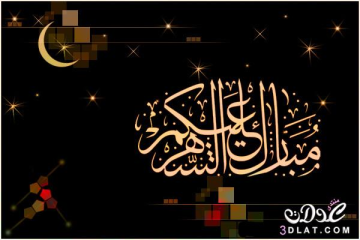

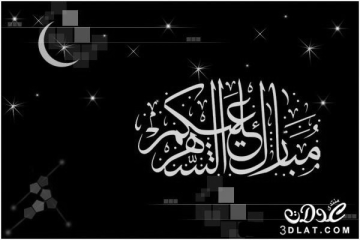

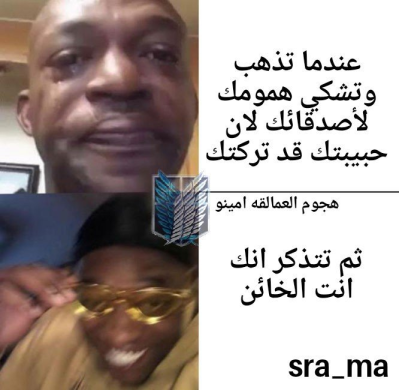

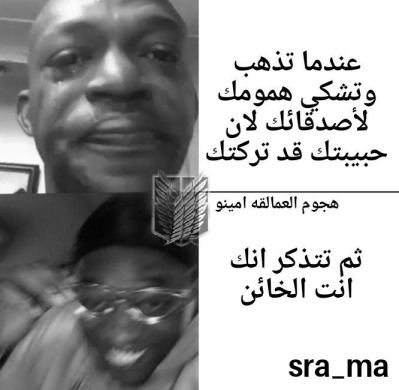

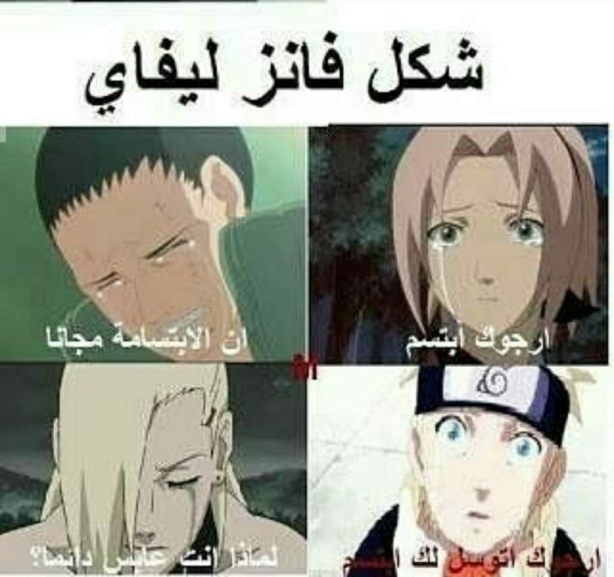

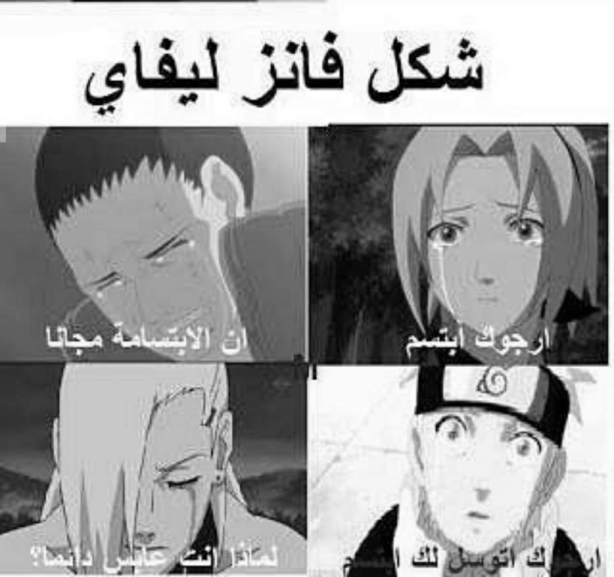

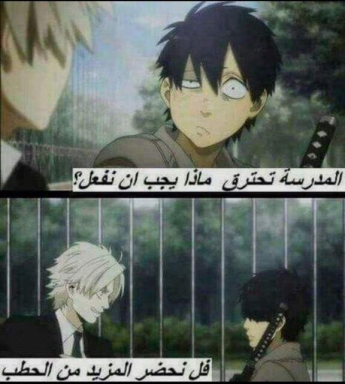

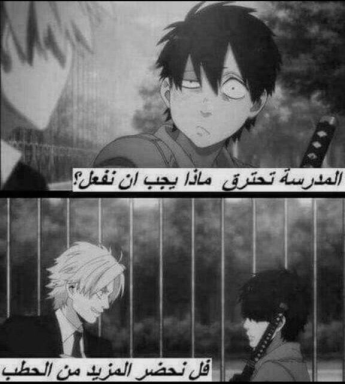

In [32]:
for image in files:
  img = cv.imread(os.path.join(path,image))
  dim = (int(img.shape[1] * scale_percent / 100), int(img.shape[0] * scale_percent / 100))
  img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
  cv2_imshow(img)
  print('\n')

  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  cv2_imshow(gray)
  print('\n')
  cv.imwrite(os.path.join(dstpath, image), gray)

In [33]:
f = []
t = []
path_dir = r'./gray_img/'

In [35]:
for root, dirs, filenames in os.walk(path_dir):
  for filename in filenames:
    try:
      print(filename)
      f.append(filename)
      #print(f)
      img = im.open(path_dir+ filename)
      text = ts.image_to_string(img, lang = 'ara')
      t.append(text)
      #print(text)
      print('-='*20)
    except Exception as e:
      print(e)

3dlat.net_06_15_c2ac_66.jpg
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
3b356a9ee49b45216b9c9975f143fe67489d.jpg
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
3d04cb5fb1db781af83b32d295f1acc89da4.jpg
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
3e4b030bdf04e1369a14ac0730d0ec184076.jpg
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [36]:
data = pd.DataFrame(list(zip(f, t)),columns=['img','text'])
data.to_csv('cleaned_text.csv', index=False)

In [37]:
data.head()

,img,text
0,3dlat.net_06_15_c2ac_66.jpg,\n\n \n\n \n\nال\n\n \n\n \n
1,3b356a9ee49b45216b9c9975f143fe67489d.jpg,\n
2,3d04cb5fb1db781af83b32d295f1acc89da4.jpg,\n
3,3e4b030bdf04e1369a14ac0730d0ec184076.jpg,\n
